<a href="https://colab.research.google.com/github/JEunJin/BigData_python/blob/master/styleGan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#StyleGAN2-ADA 코드 불러오기 (GPU 연결 후 실행)
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 22.26 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch


In [ ]:
#사전 학습된 사람 얼굴 모델 다운로드
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

--2025-04-29 12:19:55--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 18.238.243.68, 18.238.243.57, 18.238.243.45, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|18.238.243.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  22.3MB/s    in 5.0s    

2025-04-29 12:20:00 (72.5 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



In [ ]:
#얼굴 이미지 생성하기(생성된 이미지가 out폴더에 저장됨)

#코드1 정해진 랜덤값으로 고정된 이미지를 생성하고자 하는 경우
#빠른 CUDA 최적화 버전을 못 쓰고, 느린 PyTorch CPU 코드(reference implementation)로 대체한 것에 대한 경고 출력(무시해도 됨)
#!python generate.py --outdir=out --trunc=0.7 --seeds=200 --network=ffhq.pkl

#코드2 매번 새로운 랜덤값으로 새로운 이미지 생성하고자 하는 경우
import random, os

seed = random.randint(1000, 99999)
outdir = f"out_seed_{seed}"
print(f"Generating image with seed {seed} in folder {outdir}")

os.system(f"python generate.py --outdir={outdir} --trunc=0.7 --seeds={seed} --network=ffhq.pkl")

Generating image with seed 41272 in folder out_seed_41272


0

In [ ]:
#GPU연결 확인
import torch
torch.cuda.is_available()

True

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

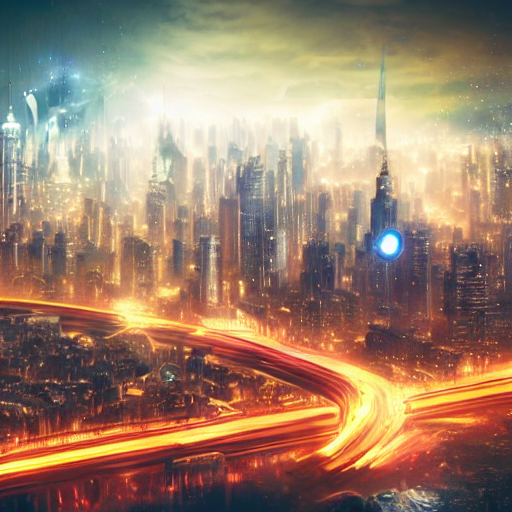

In [5]:
#가상의 배경 이미지 생성코드
!pip install diffusers transformers accelerate scipy safetensors
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

prompt = "fantasy cityscape with glowing lights, futuristic background, high resolution"
image = pipe(prompt).images[0]
image.save("fantasy_background.png")

# 결과 보여주기
from PIL import Image
from IPython.display import display
display(image)